In [564]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

In [565]:
import geopandas as gpd

# 读取邮政编码和公园的shapefile
postcodes = gpd.read_file("../../data/raw/external/postcode/POSTCODE_POLYGON.shp")
parks = gpd.read_file("../../data/raw/external/PARKERS/PARKRES.shp")

# 检查两个数据集的坐标参考系统 (CRS) 是否匹配
if postcodes.crs != parks.crs:
    parks = parks.to_crs(postcodes.crs)

# 进行空间连接，使用 "intersects" 谓词，只要公园与邮政编码有部分重叠就算匹配
parks_in_postcode = gpd.sjoin(parks, postcodes, how="inner", predicate="intersects")

# 统计每个邮政编码区域内的公园数量和公园的平均面积（基于 'TOTAL_AREA' 列）
parks_stats = parks_in_postcode.groupby("POSTCODE").agg(
    park_count=("POSTCODE", "size"),  # 计算每个邮政编码的公园数量
    mean_park_area=("TOTAL_AREA", "mean")  # 计算每个邮政编码的公园平均面积
).reset_index()

# 输出结果并保存到CSV
print(parks_stats)
parks_stats.to_csv("../../data/landing/parks.csv", index=False)


    POSTCODE  park_count  mean_park_area
0       3004           4      110.079750
1       3011           2       84.240000
2       3015           3      103.036000
3       3016           5       38.051000
4       3018           1        5.396000
..       ...         ...             ...
555     3990           1      382.573000
556     3991           5      221.444200
557     3992           3     1099.514000
558     3995          43      641.789953
559     3996          14     1766.632571

[560 rows x 3 columns]


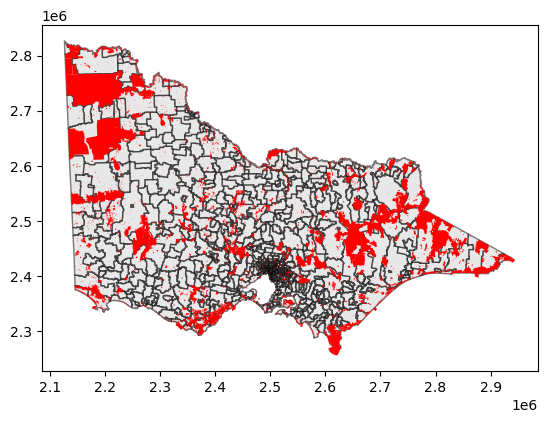

In [566]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
postcodes.plot(ax=ax, color='lightgrey', edgecolor='black', alpha=0.5)
parks.plot(ax=ax, color='red', markersize=5)

plt.show()